In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
[column for column in Measurement.__table__.columns]

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [9]:
[column for column in Station.__table__.columns]

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [10]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
recent_date.date

'2017-08-23'

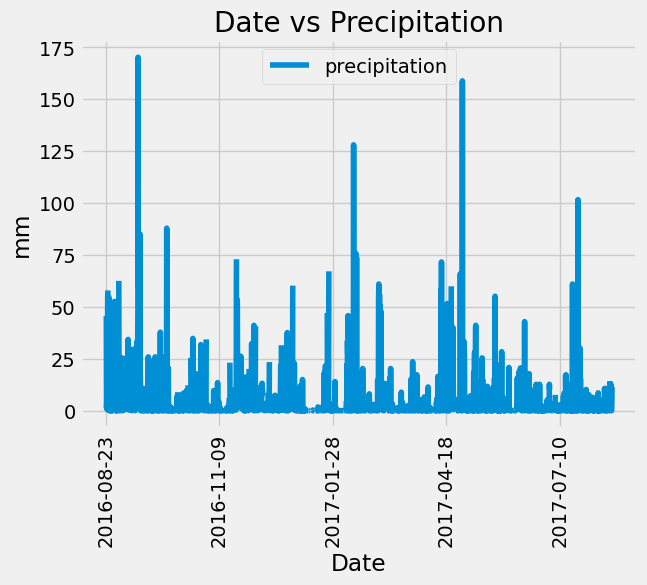

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt
from matplotlib.ticker import MultipleLocator

most_recent_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_from_recent_date = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
recent_dataset = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= most_recent_date).filter(Measurement.date >= year_from_recent_date).all()

    
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(recent_dataset, columns=['Date', 'precipitation'])
df = df.sort_values(by='Date')
df.plot(x='Date', y='precipitation', rot=90)
plt.ylabel('mm')
plt.title('Date vs Precipitation')
plt.show()

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date
#.order_by(Measurement.date.desc())

# Use Pandas Plotting with Matplotlib to plot the data


In [21]:
count = df['precipitation'].count()
mean = df['precipitation'].mean()
std = df['precipitation'].std()
min = df['precipitation'].min()
max = df['precipitation'].max()
quartiles = df['precipitation'].quantile([0.25,0.5,0.75])

    
precipitation = pd.DataFrame([count, mean, std, min, quartiles[0.25], quartiles[0.5], quartiles[0.75], max], columns=['precipitation'])
precipitation.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
precipitation

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
recent_date = session.query(Measurement.station).distinct().count()
recent_date

9

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_list = session.query(Station.station).all()
active_stations = []

for station in station_list:
    count = session.query(Measurement).filter(Measurement.station==station.station).count()
    active_stations.append((station.station, count))
    
stations_df = pd.DataFrame(active_stations, columns=['Stations', 'Observation Counts']).sort_values(by=['Observation Counts'], ascending=False)
active_stations = stations_df.values.tolist()
active_stations

[['USC00519281', 2772],
 ['USC00519397', 2724],
 ['USC00513117', 2709],
 ['USC00519523', 2669],
 ['USC00516128', 2612],
 ['USC00514830', 2202],
 ['USC00511918', 1979],
 ['USC00517948', 1372],
 ['USC00518838', 511]]


## USC00519281 is the Station with the most observations.

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station==most_active_station).all()

[(12.2, 29.4, 22.035822510822513)]

In [25]:
recent_date = session.query(Measurement).filter(Measurement.station==most_active_station).order_by(Measurement.date.desc()).first()
recent_date.date

'2017-08-18'

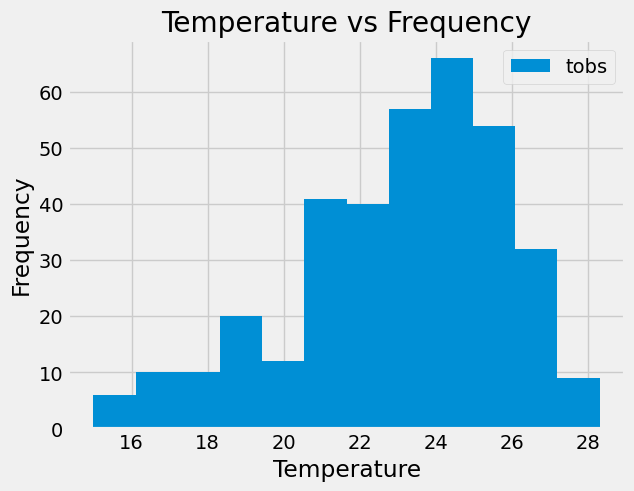

In [30]:
most_recent_date = dt.date(2017, 8, 18)

# Calculate the date one year from the last date in data set.
year_from_recent_date = most_recent_date - dt.timedelta(days=365)
year_from_recent_date

tobs_dataset = session.query(Measurement.tobs).filter(Measurement.station==most_active_station).filter(Measurement.date <= most_recent_date)\
    .filter(Measurement.date >= year_from_recent_date).all()
tobs_dataset


df = pd.DataFrame(tobs_dataset, columns=['tobs'])
df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.title('Temperature vs Frequency')
plt.show()

Text(0.5, 4.183333333333314, 'Temperature')

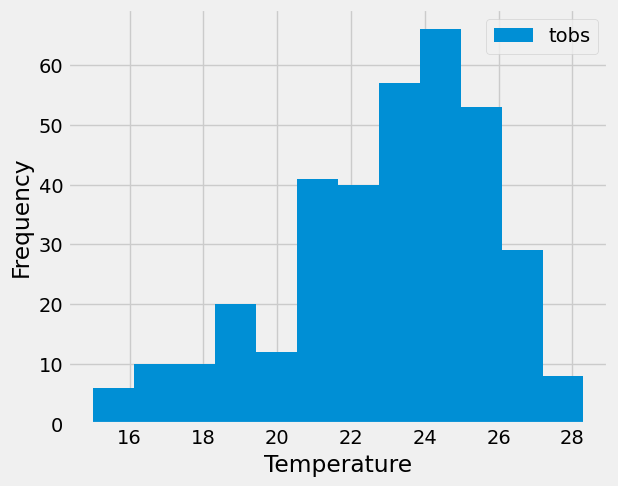

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [31]:
# Close Session
session.close()